## This time our mask will have multiclass labels

It will be handled automatically, but we need to pass the name of labels column in mask file

In [1]:
from utils.featurizer import SentinelFeaturizer
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
featurizer = SentinelFeaturizer(image='sentinel_data_4_bands.tif',
                                mask='mask.geojson',
                                mask_label_column='class')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


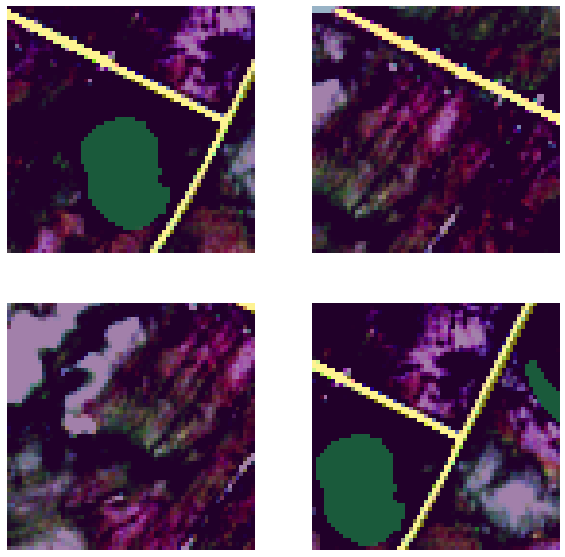

In [3]:
featurizer.normalize()
featurizer.plot(tile_size=64)

In [4]:
X, y = featurizer.get_features(window_size=3)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (31824, 36)
y shape: (31824,)


## Shapes are the same as in previous tutorial, but there are 4 unique labels

In [5]:
np.unique(y)

array([0, 1, 2, 3])

## We can easily get back to initial image or mask by reshaping vectorized data

Dont forget that using windowed featurizing we loose info about border pixels, so we pad them

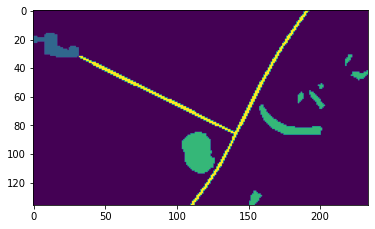

In [6]:
height = featurizer.height
width = featurizer.width
pad = 1

plt.imshow(y.reshape(height - 2 * pad, width - 2 * pad))